In [1]:
import pandas as pd

In [3]:
attrition_past = pd.read_csv('https://bradfordtuckfield.com/attrition_past.csv')

In [4]:
attrition_past.head(3)

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0


In [5]:
pd.set_option('display.max_columns',6)

## Plotting Attrition Risk

In [11]:
# Shows percent of clients that exited their contracts in the last 6 months
print(f"{round(attrition_past['exited'].mean()*100,2)}%")

57.69%


In [14]:
import matplotlib.pyplot as plt

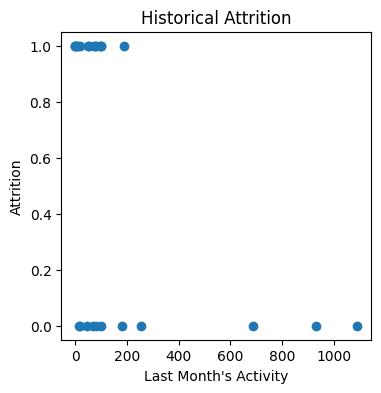

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

## Confirming Relationships with Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
X = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited'].values.reshape(-1,1)

In [24]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [34]:
# coefficient of linear model
regressor.coef_[0]

array([-0.00081503])

In [36]:
# y intercept value of linear model
regressor.intercept_[0]

0.711935651913667

In [28]:
import matplotlib.pyplot as plt

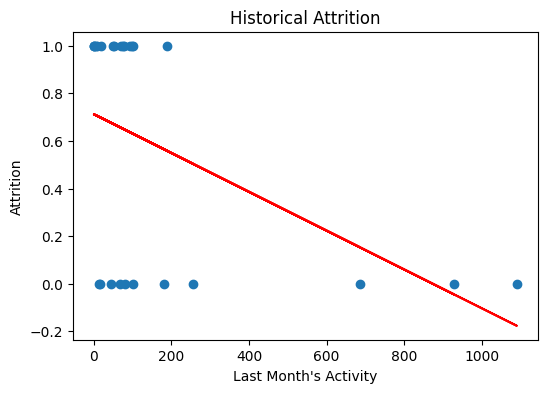

In [32]:
# create the prediction data points
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in list(attrition_past['lastmonth_activity'])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
ax.plot(attrition_past['lastmonth_activity'], prediction, color='red')
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

In [33]:
prediction

[array([0.64836344]),
 array([0.70052526]),
 array([0.5636005]),
 array([0.62961779]),
 array([0.71193565]),
 array([-0.04522565]),
 array([0.69645011]),
 array([0.63532299]),
 array([0.64591836]),
 array([0.66955418]),
 array([-0.17644521]),
 array([0.70704548]),
 array([0.63124785]),
 array([0.65080853]),
 array([0.50410343]),
 array([0.63043282]),
 array([0.65651373]),
 array([0.65406864]),
 array([0.15282623]),
 array([0.67525938]),
 array([0.71193565]),
 array([0.5578953]),
 array([0.6988952]),
 array([0.7046004]),
 array([0.71193565]),
 array([0.67281429])]

In [37]:
attrition_past['predicted']=regressor.predict(X)

In [39]:
attrition_past.head(5)

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited,predicted
0,abcd,78,1024,12,1,0.648363
1,asdf,14,2145,20,0,0.700525
2,xyzz,182,3891,35,0,0.563600
3,acme,101,10983,2,1,0.629618
4,qwer,0,118,42,1,0.711936


## Predicting the Future

In [41]:
attrition_future = pd.read_csv('https://bradfordtuckfield.com/attrition2.csv')

In [42]:
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,hhtn,166,1393,91
1,slfm,824,16920,288
2,pryr,68,549,12
3,ahva,121,1491,16
4,dmai,4,94,2


In [44]:
X = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['predicted'] = regressor.predict(X)

In [45]:
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,predicted
0,hhtn,166,1393,91,0.576641
1,slfm,824,16920,288,0.040352
2,pryr,68,549,12,0.656514
3,ahva,121,1491,16,0.613317
4,dmai,4,94,2,0.708676


## Making business recommendations

In [48]:
# show the top five companies with the highest predicted risk/percent of exiting
attrition_future.nlargest(5,'predicted')

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,predicted
8,whsh,0,40,52,0.711936
12,mike,0,0,49,0.711936
24,pian,0,12,19,0.711936
21,bass,2,19,1400,0.710306
4,dmai,4,94,2,0.708676


In [49]:
# sort corporations by their risk level of exiting
print(list(attrition_future.sort_values(by='predicted',ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


In [53]:
# print a list of companies with a risk level of exiting greater than 70%
print(list(attrition_future.loc[attrition_future['predicted'] > 0.7,'corporation']))

['dmai', 'whsh', 'oscr', 'kdic', 'mike', 'pevc', 'erin', 'angl', 'bass', 'ynus', 'pian', 'hlpd']


## Measuring Prediction Accuracy

In [57]:
themedian = attrition_past['predicted'].median()

# the greater than filter proides a True/False result to then get to a predicted 1 or 0 value
prediction = list(1*(attrition_past['predicted']>themedian))

# get the actual exited values (1 or 0) 
actual=list(attrition_past['exited'])

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
print(confusion_matrix(prediction,actual))

[[7 6]
 [4 9]]


In [62]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

In [67]:
print(round(precision,2))

0.54


In [69]:
print(round(recall,2))

0.64


## Using Multivariate LPMs

In [70]:
X3 = attrition_past.loc[:,['lastmonth_activity','lastyear_activity','number_of_employees']].values.reshape(-1,3)
y = attrition_past['exited'].values.reshape(-1,1)
regressor_multi = LinearRegression()
regressor_multi.fit(X3,y)

LinearRegression()

In [71]:
attrition_future['predicted_multi'] = regressor_multi.predict(X3)

In [75]:
# show the top five companies with the highest predicted risk/percent of exiting
attrition_future.nlargest(5,'predicted_multi')

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,predicted,predicted_multi
11,ejdc,95,1005,61,0.634508,0.870000
12,mike,0,0,49,0.711936,0.815677
13,pevc,4,6,1686,0.708676,0.788110
4,dmai,4,94,2,0.708676,0.755625
22,ynus,9,90,12,0.704600,0.715362


In [76]:
# sort corporations by their risk level of exiting
print(list(attrition_future.sort_values(by='predicted_multi',ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


## Creating New Metrics

In [82]:
attrition_future['activity_per_emplyee']= attrition_future.loc[:,'lastmonth_activity']\
                                          /attrition_future.loc[:,'number_of_employees']  

In [83]:
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,...,predicted_multi,activity_per_emplyee,activity_per_employee
0,hhtn,166,1393,...,0.613322,1.824176,1.824176
1,slfm,824,16920,...,0.678542,2.861111,2.861111
2,pryr,68,549,...,0.570637,5.666667,5.666667
3,ahva,121,1491,...,0.514784,7.562500,7.562500
4,dmai,4,94,...,0.755625,2.000000,2.000000


In [81]:
attrition_future['activity_per_employee']= attrition_future['lastmonth_activity']\
                                          /attrition_future['number_of_employees']  

In [89]:
# Use attrition_past to build a model that will be used to predict attrition_future
attrition_past['activity_per_employee'] = attrition_past['lastmonth_activity']/attrition_past['number_of_employees']
X = attrition_past[['activity_per_employee','lastmonth_activity','lastyear_activity','number_of_employees']]
y=attrition_past['exited']

In [91]:
regressor_derived=LinearRegression()
regressor_derived.fit(X,y)

LinearRegression()

In [93]:
attrition_past['predicted3']=regressor_derived.predict(X)

In [94]:
# Use the model based on the past to predict the future
X = attrition_future[['activity_per_employee','lastmonth_activity','lastyear_activity','number_of_employees']]
attrition_future['predicted3']=regressor_derived.predict(X)

In [98]:
attrition_future.drop(['activity_per_emplyee'], axis=1, inplace=True)

In [100]:
pd.set_option('display.max_columns',10)

In [102]:
attrition_future.head(3)

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,predicted,predicted_multi,activity_per_employee,predicted3
0,hhtn,166,1393,91,0.576641,0.613322,1.824176,0.740311
1,slfm,824,16920,288,0.040352,0.678542,2.861111,0.624450
2,pryr,68,549,12,0.656514,0.570637,5.666667,0.620251


In [103]:
# sort corporations by their risk level of exiting
print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


In [107]:
themedian = attrition_past['predicted3'].median()
prediction = list(1*(attrition_past['predicted3']>themedian))
actual = list(attrition_past['exited'])

In [108]:
# create confusion matrix of the past prediction vs past actuals
print(confusion_matrix(prediction, actual))

[[ 9  4]
 [ 2 11]]


In [109]:
themedian = attrition_future['predicted3'].median()
prediction = list(1*(attrition_future['predicted3']>themedian))
actual = list(attrition_past['exited'])

In [110]:
# create confusion matrix of the past prediction vs past actuals
print(confusion_matrix(prediction, actual))

[[ 9  4]
 [ 2 11]]


In [111]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

In [112]:
print(round(precision,2))
print(round(recall,2))

0.69
0.82


## Predicting Binary Outcomes with Logistic Regression

In [113]:
import matplotlib.pyplot as plt

In [115]:
import numpy as np
import math

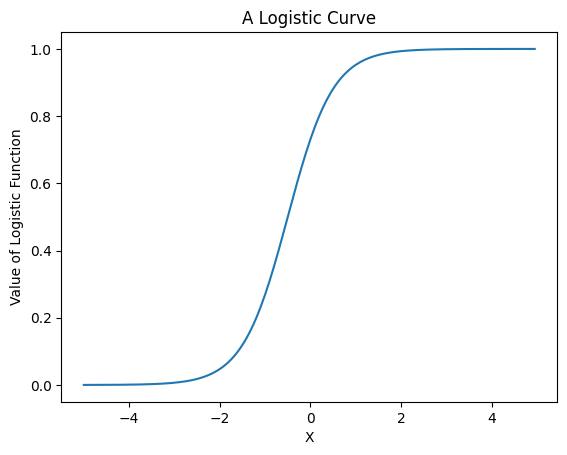

In [118]:
x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title("A Logistic Curve")
plt.show()

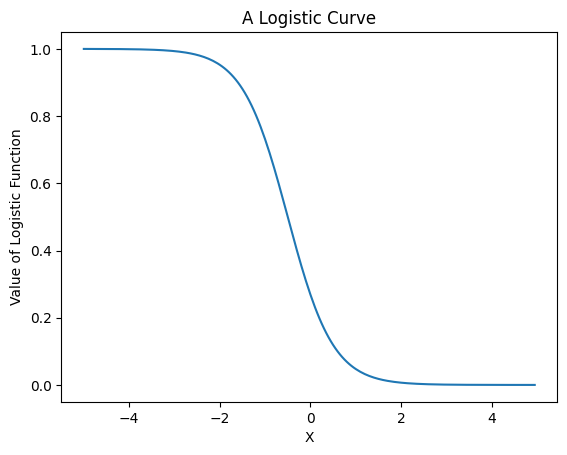

In [119]:
x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title("A Logistic Curve")
plt.show()

## Fitting the Logistic Function To Our Data

In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression(solver='liblinear', random_state=0)
X = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [130]:
attrition_past['logisticprediction'] = model.predict_proba(X)[:,1]

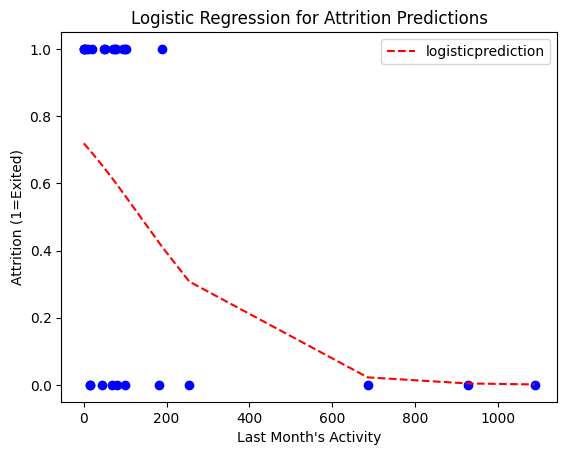

In [132]:
fig = plt.scatter(attrition_past['lastmonth_activity'],
                  attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity',\
                                                     'logisticprediction',ls='--', ax=fig.axes, color='red')
plt.title("Logistic Regression for Attrition Predictions")
plt.xlabel("Last Month\'s Activity")
plt.ylabel("Attrition (1=Exited)")
plt.show()

In [135]:
X = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction'] = model.predict_proba(X)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction', ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']
